# Final Project

# Option 3: Custom AI Solution

## Phase 1: Simple Model 

IMPORTANT: MY REPORT IS IN THE FORM OF DETAILED MARKDOWNS AND COMMENTS BELOW AND AFTER EACH STEP.

#### Dataset Selection 

I chose the iris dataset for this project since it is of small size, has tabular data and has a multiclass classification problem. My dataset has 4 features: Sepal Length, Sepal Width, Petal Length, Petal Width.

In [42]:
#importing pandas to load the dataset

import pandas as pd

In [43]:
#loading the datset

url = r"C:\Users\HP\Downloads\archive (4)\iris.data.csv"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, header=None, names=column_names)

#displaying the dataset

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
#displaying the first 10 rows

iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Preprocessing the data

In [45]:
#now first i will convert the the species column in the dataset to numeric format. 
#we have 3 species in the species column. i have converted them as below:
# 0 for Iris-setosa
# 1 for Iris-versicolor
# 2 for Iris-virginica

iris_df['species'] = iris_df['species'].map({
    'Iris-setosa': 0,       
    'Iris-versicolor': 1,    
    'Iris-virginica': 2      
})

In [46]:
#then i seperated the features and the target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [47]:
#importing to split data into testing and training

from sklearn.model_selection import train_test_split

In [48]:
#spliting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
#then i scaled my features. for this i first imported the library

from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [52]:
#my next step was to apply linear regression. 

model = LogisticRegression(multi_class='ovr', max_iter=200)

In [53]:
#training the model

model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

In [54]:
#making predictions on the test set

y_pred = model.predict(X_test)

In [55]:
#evaluating the model

accuracy = accuracy_score(y_test, y_pred)

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)


class_report = classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica'])


print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9111111111111111

Confusion Matrix:
 [[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.69      0.82        13
   Virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



## Phase 2 : Hybrid Model

In [57]:
#scaling the dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical


In [59]:
#applying one hot encoding on the target variable y

y_categorical = to_categorical(y)

In [60]:
#splitting my data into testing and training dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [61]:
#now i reshaped my data to 3d for a CNN input

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [62]:
#building the model

model = Sequential()


In [63]:
#adding the layers

#adding the convolution layer
model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
#adding the maxpooling layer

model.add(MaxPooling1D(pool_size=1))


In [65]:
#flattening 
model.add(Flatten())


In [66]:
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


In [67]:
#now for the output layer
model.add(Dense(3, activation='softmax'))

In [68]:
#compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
#training the model
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.1, verbose=1)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5531 - loss: 1.0451 - val_accuracy: 0.6667 - val_loss: 0.9363
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.8242 - val_accuracy: 0.7500 - val_loss: 0.8014
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8196 - loss: 0.6329 - val_accuracy: 0.8333 - val_loss: 0.6675
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8024 - loss: 0.4986 - val_accuracy: 0.8333 - val_loss: 0.5662
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8090 - loss: 0.4563 - val_accuracy: 0.8333 - val_loss: 0.4929
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8480 - loss: 0.3218 - val_accuracy: 0.9167 - val_loss: 0.4738
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8432 - loss: 0.2780 - val_accuracy: 0.9167 - val_loss: 0.4592
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8738 - loss: 0.2910 - val_accuracy: 0.9167 - val_loss

In [71]:
#evaluating the model


y_pred_proba = model.predict(X_test)


y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

#calculating the accuracy
accuracy = accuracy_score(y_test_labels, y_pred)


print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



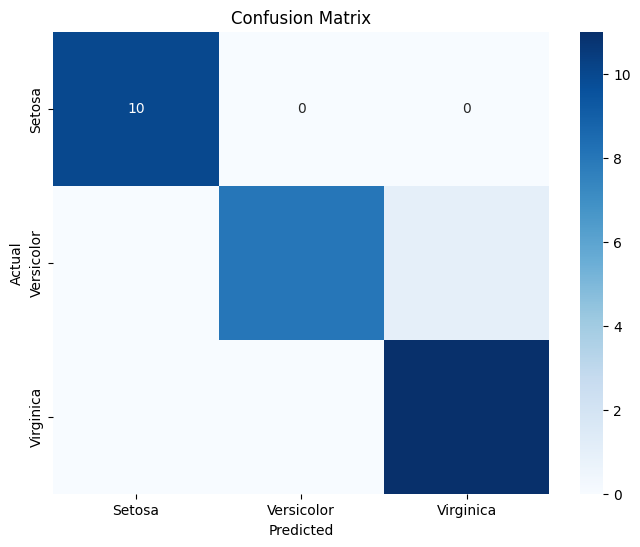

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['Setosa', 'Versicolor', 'Virginica']


conf_matrix = confusion_matrix(y_test_labels, y_pred)

#plotting the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In this project, i used the iris dataset which i forst loaded and preprocessed. I then trained it using linear regression and calculated its accuracy. 

For phase 2, i applied CNN. I first reshaped my data for 3D input and the applied one hot encoding to it. I applied the layers and then calculated the accuracy. 
If I compare both the models, CNN model is better than logistic regression as it has the ability to learn from the data and can also learn more complex patterns.


